In [1]:
import numpy as np 
import pandas as pd 
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
df.shape

(215, 15)

In [3]:
df=df.drop(['sl_no','salary'],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1


In [5]:
X=df.drop(['status_Placed'],axis=1)
Y=df['status_Placed'].copy()

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0.739434,1.082459,0.800763,0.950082,-0.856663,-0.23221,1.626059,-0.724446,1.123903
1,1.113369,1.103448,1.513267,1.087157,0.687620,0.739434,-0.923823,0.800763,-1.052541,1.167321,-0.23221,1.626059,1.380364,-0.889757
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0.739434,-0.923823,-1.248809,-1.052541,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0.739434,-0.923823,-1.248809,-1.052541,1.167321,-0.23221,1.626059,-0.724446,1.123903
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0.739434,-0.923823,-1.248809,0.950082,-0.856663,-0.23221,-0.614984,-0.724446,-0.889757


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(f"{len(X_train)} {len(Y_train)}")
print(f"{len(X_test)} {len(Y_test)}")

182 182
33 33


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model=LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.9065934065934066

0.8484848484848485


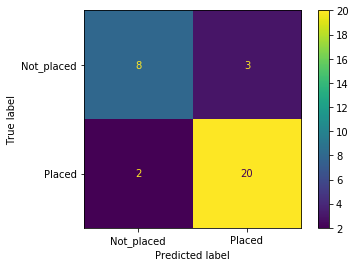

In [9]:
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(Y_test,Y_pred)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
# print(cm)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Not_placed','Placed'])
cmd.plot()

Text(0.5, 0, 'accuracy')

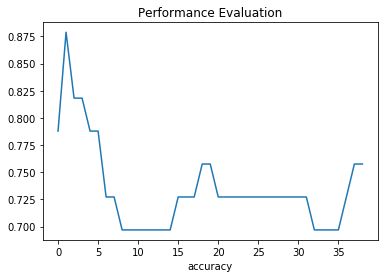

In [10]:
scores=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    score=accuracy_score(Y_test,Y_pred)
    scores.append(score)

import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(scores)
plt.title('Performance Evaluation')
plt.xlabel('accuracy')